# Data Analyses

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
data = './data/df_cleandata.csv'
data_clean = pd.read_csv(data, sep = ',')
df = pd.DataFrame(data_clean)

print(df)

            type      subtype  bedroomCount  bathroomCount         province  \
0      APARTMENT    APARTMENT           2.0            1.0         Brussels   
1          HOUSE        HOUSE           4.0            2.0         Brussels   
2      APARTMENT    APARTMENT           2.0            1.0         Brussels   
3      APARTMENT    APARTMENT           2.0            2.0         Brussels   
4      APARTMENT  FLAT_STUDIO           1.0            1.0         Brussels   
...          ...          ...           ...            ...              ...   
76365      HOUSE        VILLA           3.0            1.0          Antwerp   
76366  APARTMENT    APARTMENT           3.0            1.0         Brussels   
76367  APARTMENT    APARTMENT           3.0            1.0  Flemish Brabant   
76368  APARTMENT    APARTMENT           3.0            2.0    West Flanders   
76369  APARTMENT    APARTMENT           3.0            2.0          Antwerp   

       postCode  habitableSurface buildingCondition

In [4]:
na_values = df.isnull().sum()
missing_percent = (na_values/ len(df)) * 100
print (missing_percent.round(2))

type                 0.0
subtype              0.0
bedroomCount         0.0
bathroomCount        0.0
province             0.0
postCode             0.0
habitableSurface     0.0
buildingCondition    0.0
facedeCount          0.0
hasTerrace           0.0
epcScore             0.0
price                0.0
price_per_m2         0.0
dtype: float64


In [5]:
df.dtypes

type                  object
subtype               object
bedroomCount         float64
bathroomCount        float64
province              object
postCode               int64
habitableSurface     float64
buildingCondition     object
facedeCount          float64
hasTerrace             int64
epcScore              object
price                float64
price_per_m2         float64
dtype: object

In [6]:
print((df['price'] == 0).sum())

0


In [40]:
sns.pairplot(df, hue="type", diag_kind="kde", kind="scatter", height=2.5)


KeyboardInterrupt: 

: 

: 

## 1. Is the price significativly different between House and Apartment?

In [7]:
df_appart = df[df['type'] == 'APARTMENT']
df_house = df[df['type'] == 'HOUSE']
df_appart.to_csv("df_cleanappart.csv", index=False, encoding='utf-8')
df_house.to_csv("df_cleanhouse.csv", index=False, encoding='utf-8')

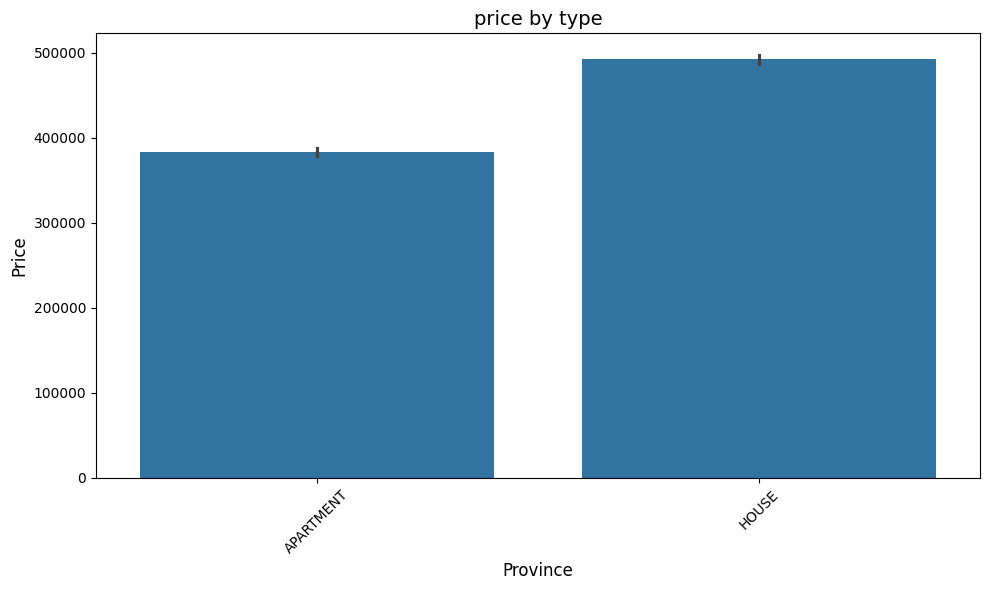

In [8]:
fig = plt.figure(figsize=(10, 6))

ax = sns.barplot(x='type', y='price', data=df)  

ax.set_title("price by type", fontsize=14)
ax.set_xlabel("Province", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [9]:
meanapp = df_appart['price'].mean()
modeapp = df_appart['price'].mode()
maxapp = df_appart['price'].max()
minapp = df_appart['price'].min()
medianapp = df_appart['price'].median()
print(f"mean price appartement : {meanapp.round(2)}")
print(f"mode price appartement : {modeapp.round(2)}")
print(f"max price appartement : {maxapp.round(2)}")
print(f"min price appartement : {minapp.round(2)}")
print(f"median price appartement : {medianapp.round(2)}")

mean price appartement : 382981.85
mode price appartement : 0    249000.0
Name: price, dtype: float64
max price appartement : 7960000.0
min price appartement : 3200.0
median price appartement : 285847.5


In [10]:
meanhouse = df_house['price'].mean()
modehouse = df_house['price'].mode()
maxhouse = df_house['price'].max()
minhouse = df_house['price'].min()
medianhouse = df_house['price'].median()

print(f"mean prince house :{meanhouse.round(2)}")
print(f"mode price house : {modehouse.round(2)}")
print(f"max price house : {maxhouse.round(2)}")
print(f"min price house : {minhouse.round(2)}")
print(f"median price house : {medianhouse.round(2)}")

mean prince house :492103.43
mode price house : 0    299000.0
Name: price, dtype: float64
max price house : 15000000.0
min price house : 3141.0
median price house : 369500.0


In [11]:
plt.figure(figsize=(10, 6))
from scipy.stats import f_oneway

# Group price by province
groups = [group["price"].dropna() for name, group in df.groupby("type")]

# ANOVA-test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 848.45
P-value: 0.0000


<Figure size 1000x600 with 0 Axes>

## 1. Check relationship Price per Province

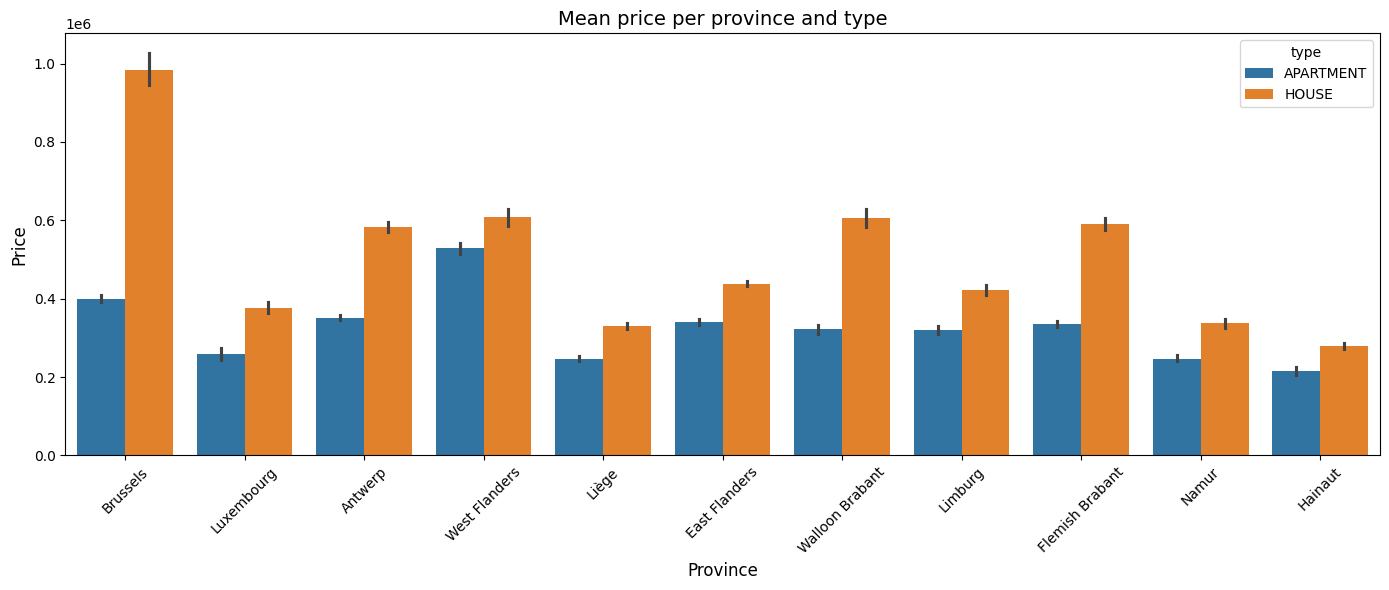

In [12]:
fig = plt.figure(figsize=(14, 6))

ax = sns.barplot(x='province', y='price', hue='type', data=df)  

ax.set_title("Mean price per province and type", fontsize=14)
ax.set_xlabel("Province", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
plt.figure(figsize=(10, 6))
from scipy.stats import f_oneway

# Group price by province
groups = [group["price"].dropna() for name, group in df_appart.groupby("province")]

# ANOVA-test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")


F-statistic: 200.81
P-value: 0.0000


<Figure size 1000x600 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 6))
from scipy.stats import f_oneway

# Group price by province
groups = [group["price"].dropna() for name, group in df_house.groupby("province")]

# ANOVA-test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 414.26
P-value: 0.0000


<Figure size 1000x600 with 0 Axes>

* Conclusion : Province has a strong relationship on the pricing.
    - p_value < 0.05 (P-value for appart & for house is == 0) meaning a strong a significative difference by province (not due to a hasard distribution). 
    - f_sTatistic means a higher variation of price by province than price variation insight the province. 

Note : Type has a significative impact on pricing. Let's see if there are a difference 

## 1 Relationship price and epcScore

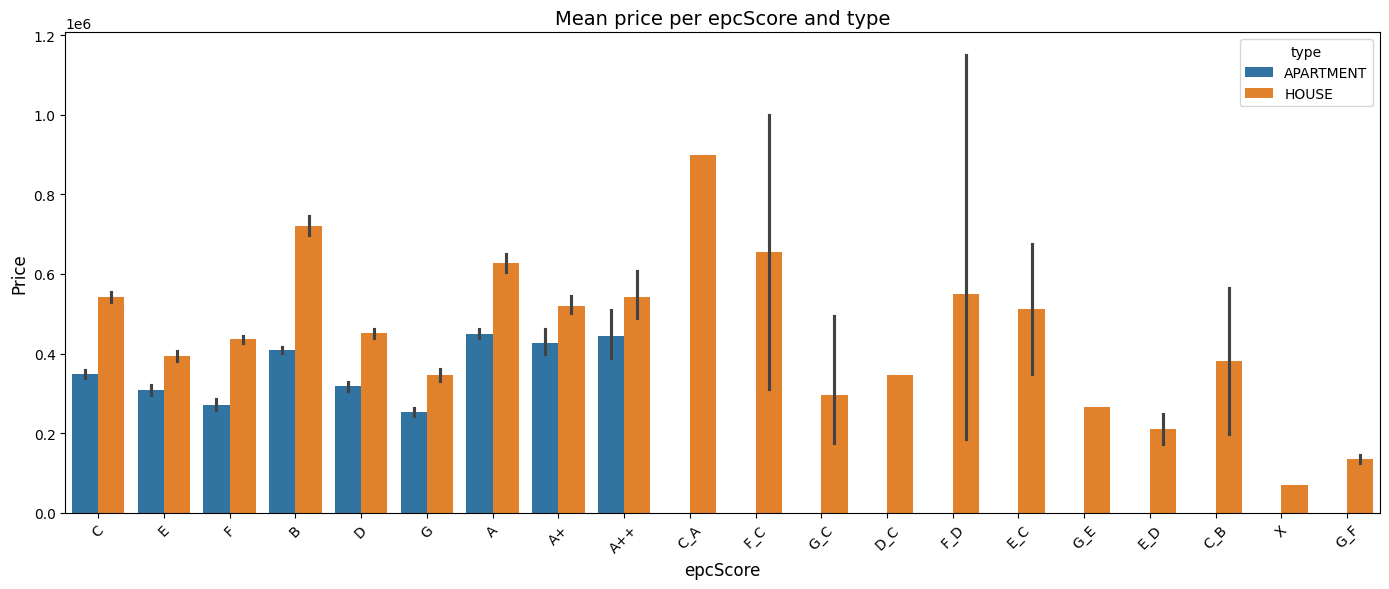

In [31]:
fig = plt.figure(figsize=(14, 6))

ax = sns.barplot(x='epcScore', y='price', hue='type', data=df)  

ax.set_title("Mean price per epcScore and type", fontsize=14)
ax.set_xlabel("epcScore", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
from scipy.stats import f_oneway

groups = [group["price"].dropna() for name, group in df_house.groupby("epcScore")]


# ANOVA-test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 85.74
P-value: 0.0000


<Figure size 1000x600 with 0 Axes>

In [34]:
plt.figure(figsize=(10, 6))
from scipy.stats import f_oneway

groups = [group["price"].dropna() for name, group in df_appart.groupby("epcScore")]


# ANOVA-test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 77.98
P-value: 0.0000


<Figure size 1000x600 with 0 Axes>

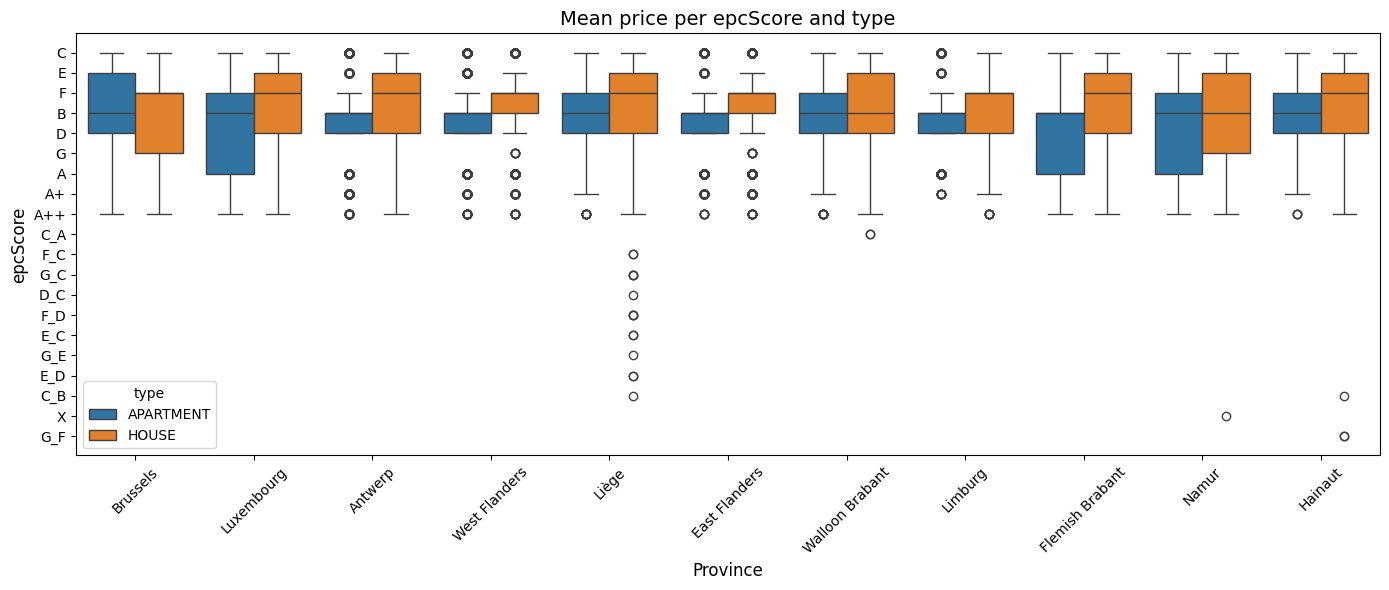

In [ ]:
fig = plt.figure(figsize=(14, 6))
ax = sns.boxplot(x='province', y='epcScore', hue='type', data=df)  

ax.set_title("Mean price per epcScore and type", fontsize=14)
ax.set_ylabel("epcScore", fontsize=12)
ax.set_xlabel("Province", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 2. Visualisation of the repartition of subtype appartement

<Figure size 1000x800 with 0 Axes>

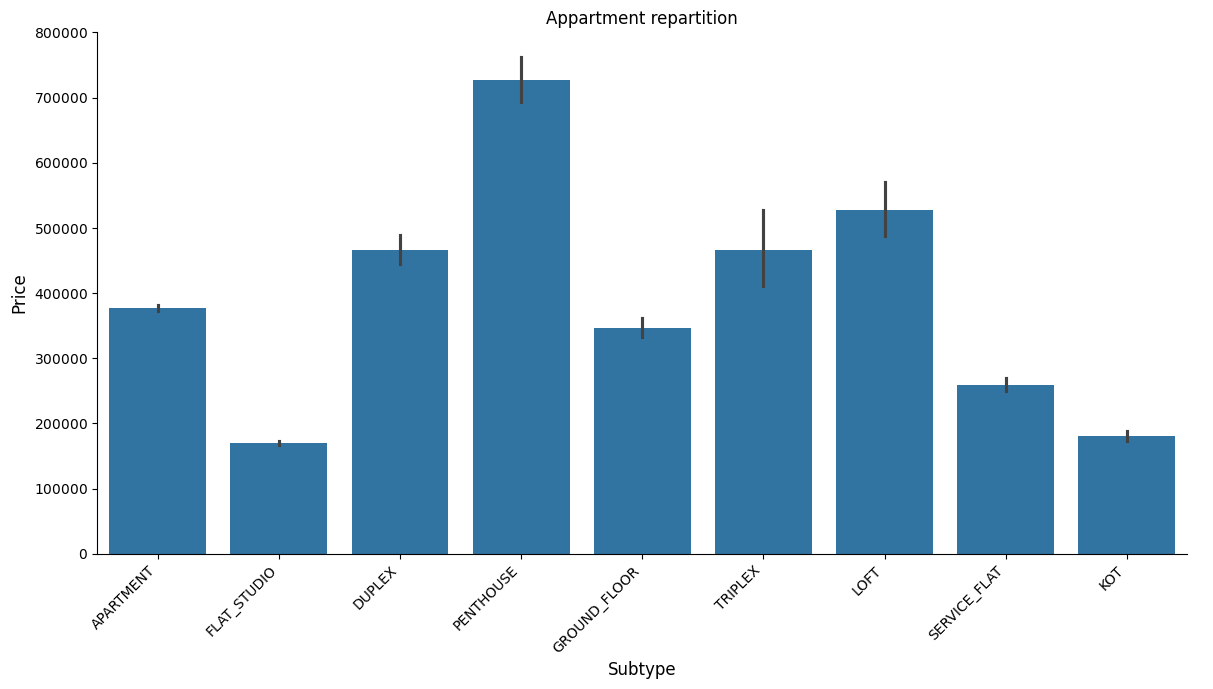

In [15]:
plt.figure(figsize=(10, 8))
g = sns.catplot(data=df_appart, x="subtype", y="price", kind="bar", height=6, aspect=2)
ax = g.ax
ax.set_title("Appartment repartition", fontsize=12)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)



In [16]:
plt.figure(figsize=(10, 6))
from scipy.stats import f_oneway

# Group price by province
groups = [group["price"].dropna() for name, group in df_appart.groupby("subtype")]

# ANOVA-test
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")

F-statistic: 221.61
P-value: 0.0000


<Figure size 1000x600 with 0 Axes>

subtype
APARTMENT       76.57
GROUND_FLOOR     5.69
DUPLEX           5.43
FLAT_STUDIO      4.43
PENTHOUSE        4.06
SERVICE_FLAT     1.44
KOT              1.06
LOFT             0.83
TRIPLEX          0.48
Name: count, dtype: float64


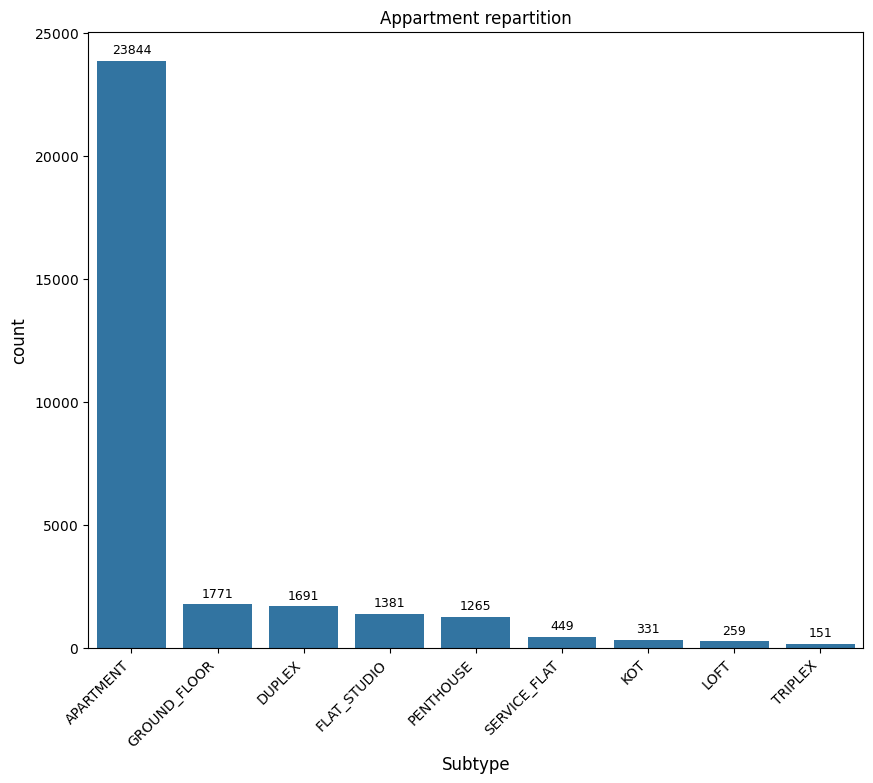

In [17]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_appart, x="subtype", order=df_appart['subtype'].value_counts().index)
ax.set_title("Appartment repartition", fontsize=12)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

subtype_counts = df_appart['subtype'].value_counts()
subtype_percent = (subtype_counts / subtype_counts.sum() * 100).round(2)
print(subtype_percent)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

<Figure size 1000x800 with 0 Axes>

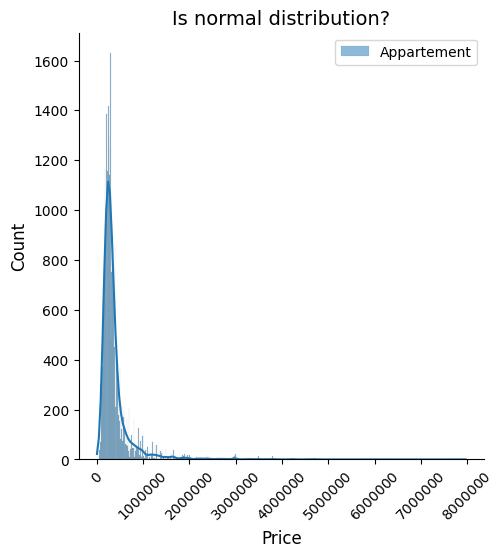

In [18]:
plt.figure(figsize=(10, 8))
#filtered_df = df_appart[df_appart['price'] <= 800000]
#appart_df = filtered_df[filtered_df['type'] == 'APARTMENT']
#g = sns.displot(appart_df['price'], label='Appartement',kde = True)
g = sns.displot(df_appart['price'], label='Appartement',kde = True)
ax = g.axes[0,0]

ax.set_title("Is normal distribution?", fontsize=14)
ax.set_xlabel("Price", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.legend()
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

1. Visualisation of the repartition of subtype house

C:\Users\nattt\AppData\Local\Temp\ipykernel_25400\1224429013.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\nattt\AppData\Local\Temp\ipykernel_25400\1224429013.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x800 with 0 Axes>

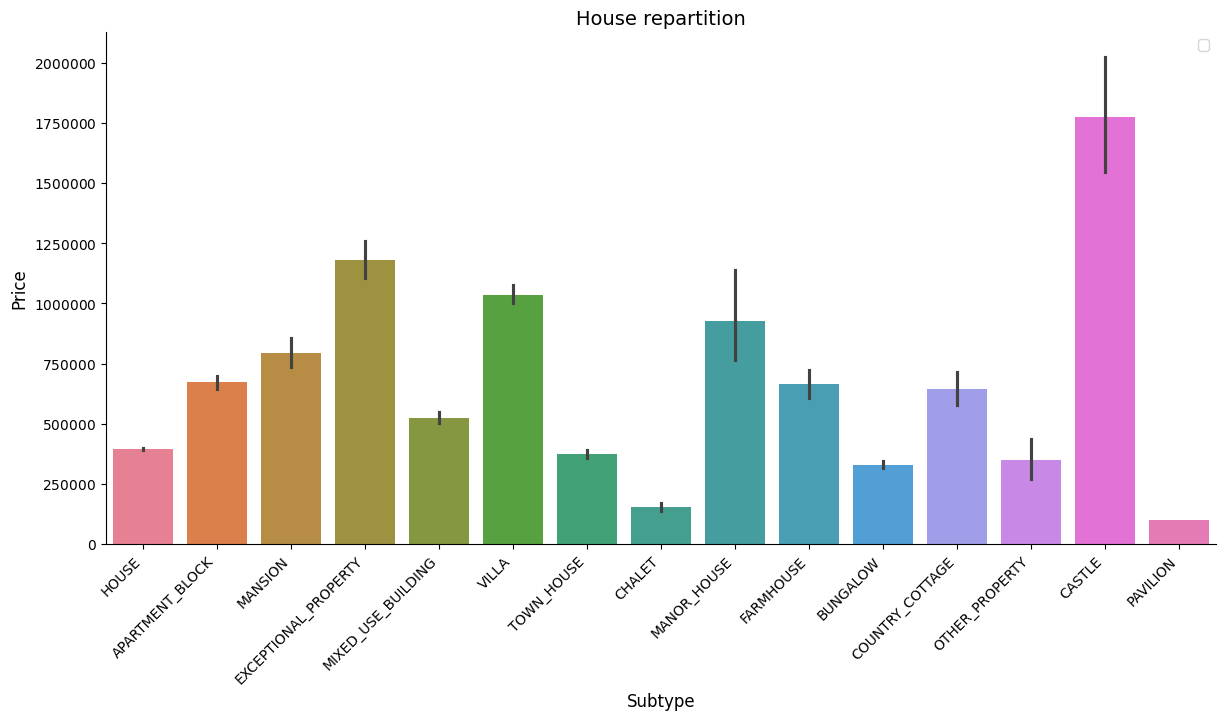

In [19]:
plt.figure(figsize=(10, 8))
g =sns.catplot(data=df_house, x="subtype", y="price", hue="subtype", kind="bar",height=6, aspect=2)

ax = g.ax
ax.set_title("House repartition", fontsize=14)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("Price", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
plt.legend()


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)
plt.legend()

subtype
HOUSE                   75.11
VILLA                    8.33
APARTMENT_BLOCK          5.43
MIXED_USE_BUILDING       4.07
EXCEPTIONAL_PROPERTY     1.80
MANSION                  1.20
TOWN_HOUSE               1.05
BUNGALOW                 0.94
COUNTRY_COTTAGE          0.68
FARMHOUSE                0.64
CHALET                   0.37
CASTLE                   0.15
OTHER_PROPERTY           0.12
MANOR_HOUSE              0.10
PAVILION                 0.00
Name: count, dtype: float64


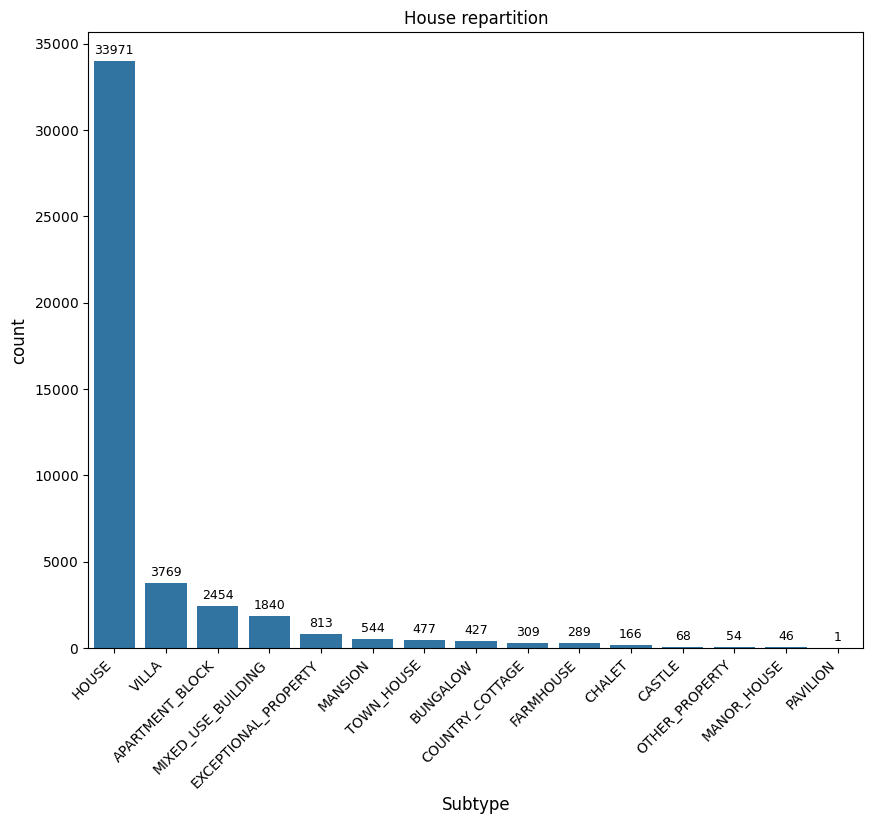

In [20]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_house, x="subtype", order=df_house['subtype'].value_counts().index)
ax.set_title("House repartition", fontsize=12)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("count", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=9)

subtype_counts = df_house['subtype'].value_counts()
subtype_percent = (subtype_counts / subtype_counts.sum() * 100).round(2)
print(subtype_percent)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

<Figure size 1000x800 with 0 Axes>

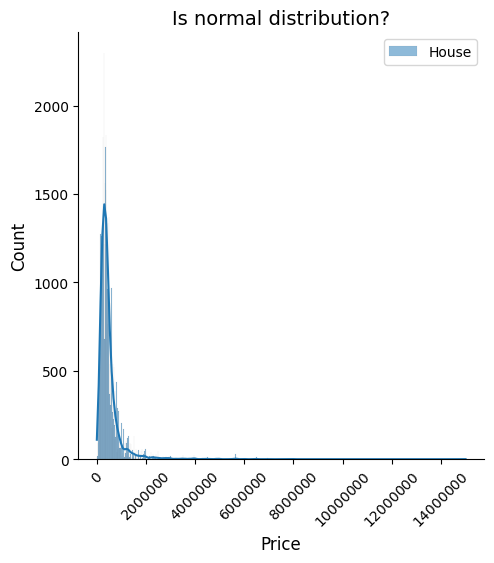

In [21]:
plt.figure(figsize=(10, 8))
#filtered_df = df_house[df_house['price'] <= 2000000]
#house_df = filtered_df[filtered_df['type'] == 'HOUSE']
#g = sns.displot(house_df['price'], label='House',kde = True)
g = sns.displot(df_house['price'], label='House',kde = True)
ax = g.axes[0,0]

ax.set_title("Is normal distribution?", fontsize=14)
ax.set_xlabel("Price", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.legend()
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)


2. Check the criteria

<Figure size 1000x800 with 0 Axes>

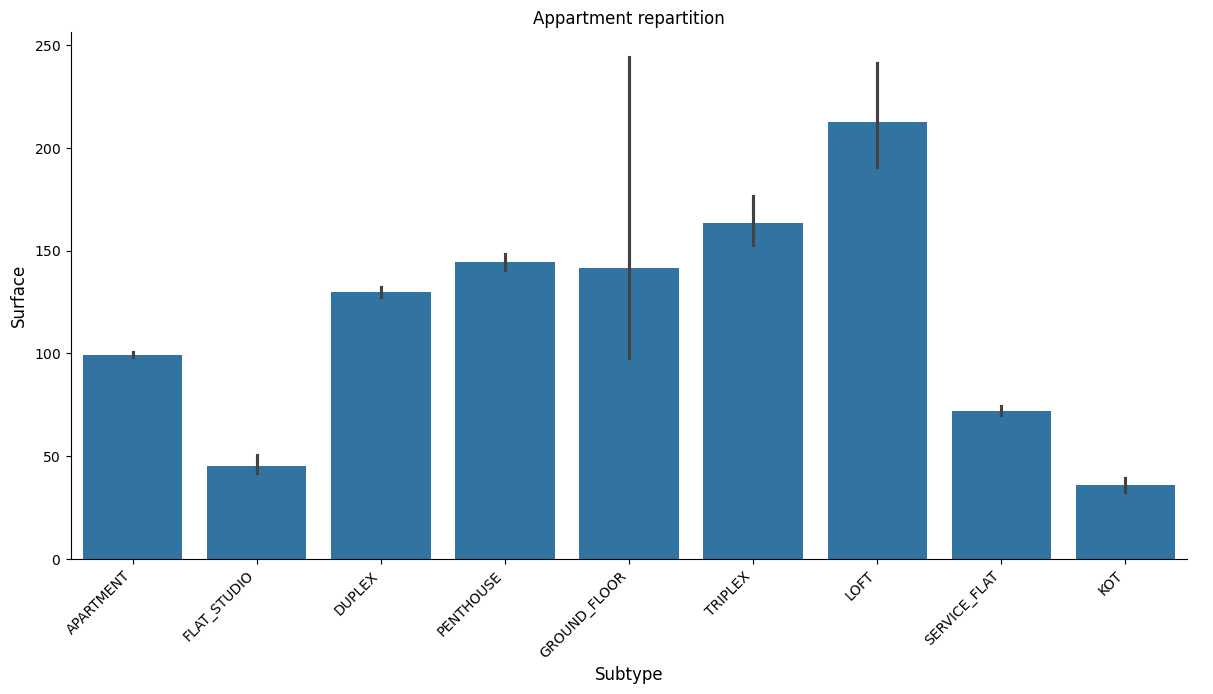

In [22]:
plt.figure(figsize=(10, 8))
g = sns.catplot(data=df_appart, x="subtype", y='habitableSurface', kind="bar", height=6, aspect=2)
ax = g.ax
ax.set_title("Appartment repartition", fontsize=12)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("Surface", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)


<Figure size 1000x800 with 0 Axes>

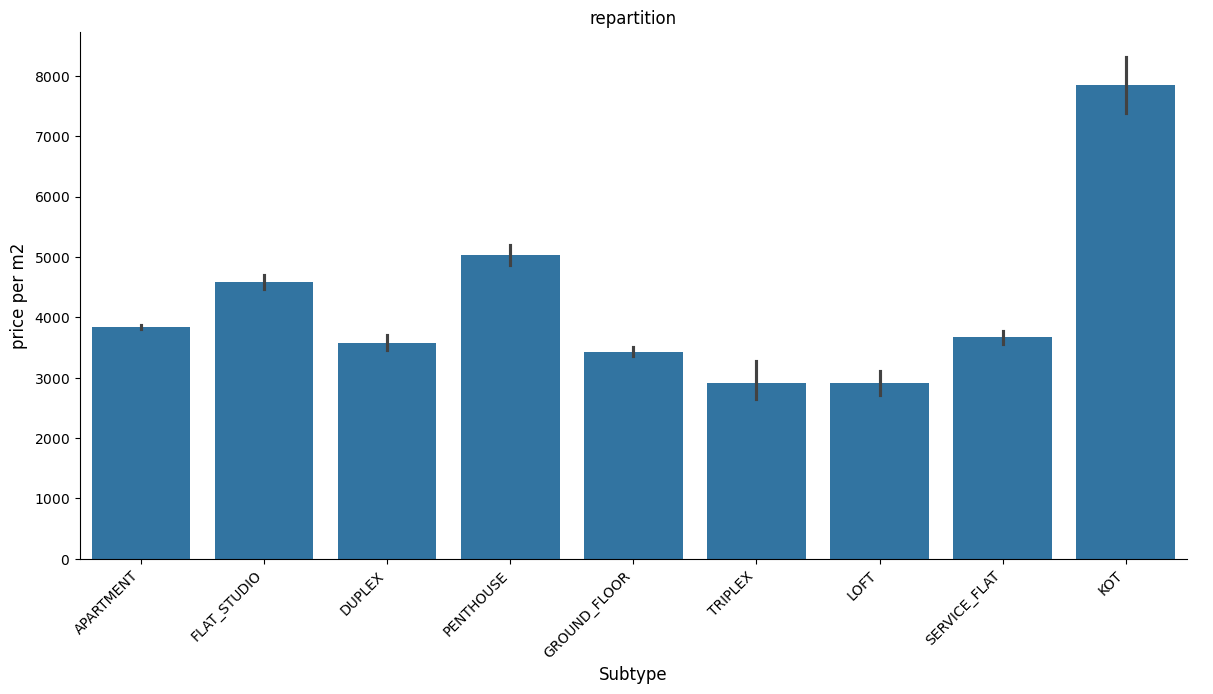

In [23]:
plt.figure(figsize=(10, 8))
g = sns.catplot(data=df_appart, x="subtype", y='price_per_m2', kind="bar", height=6, aspect=2)
ax = g.ax
ax.set_title("repartition", fontsize=12)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("price per m2", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)


Correlation price/m² : 0.07


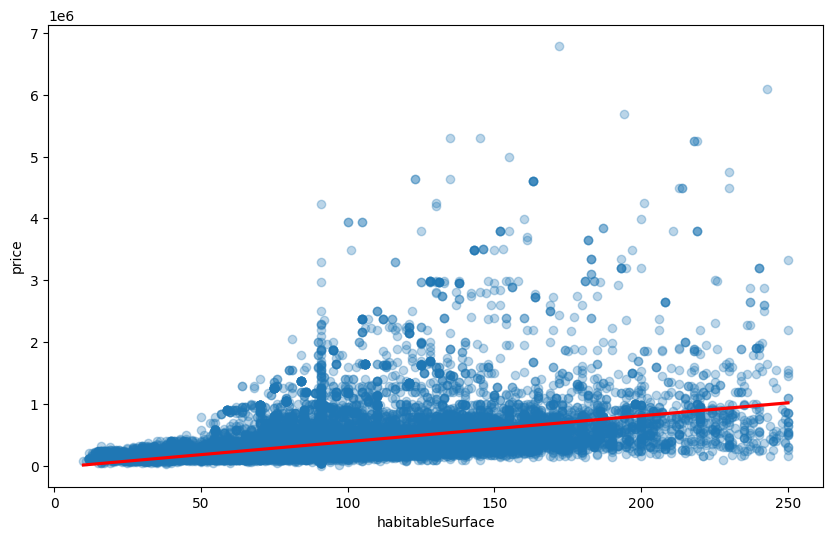

In [24]:
plt.figure(figsize=(10, 6))
app_surfprice = df_appart[df_appart['habitableSurface'] <= 250] 
sns.regplot(data=app_surfprice, x="habitableSurface", y="price", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
#sns.regplot(data=df_appart, x="habitableSurface", y="price", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
correlation = df_appart['price'].corr(df_appart['habitableSurface'])
print(f"Correlation price/m² : {correlation:.2f}")


In [25]:
Appmax_bedroomCount = df_appart['bedroomCount'].mode()
Housemax_bedroomCount = df_house['bedroomCount'].mode()
print(Appmax_bedroomCount)
print(Housemax_bedroomCount)



0    2.0
Name: bedroomCount, dtype: float64
0    3.0
Name: bedroomCount, dtype: float64


Correlation price/bedroomCount : 0.37


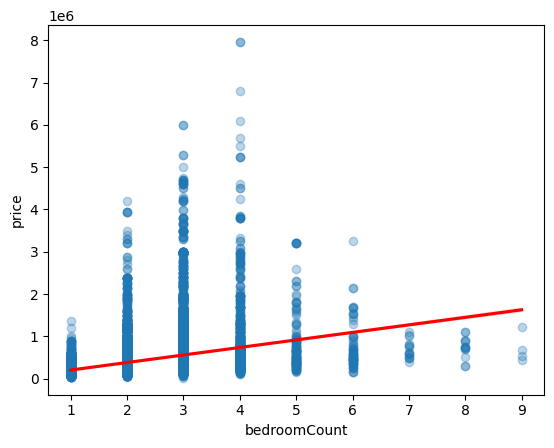

In [26]:
bedroom = df_appart[(df_appart['bedroomCount'] < 10) & (df_appart['bedroomCount'] >= 1)]
sns.regplot(data=bedroom, x="bedroomCount", y="price", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
correlation = df_appart['price'].corr(bedroom['bedroomCount'])
print(f"Correlation price/bedroomCount : {correlation:.2f}")

<Figure size 1000x800 with 0 Axes>

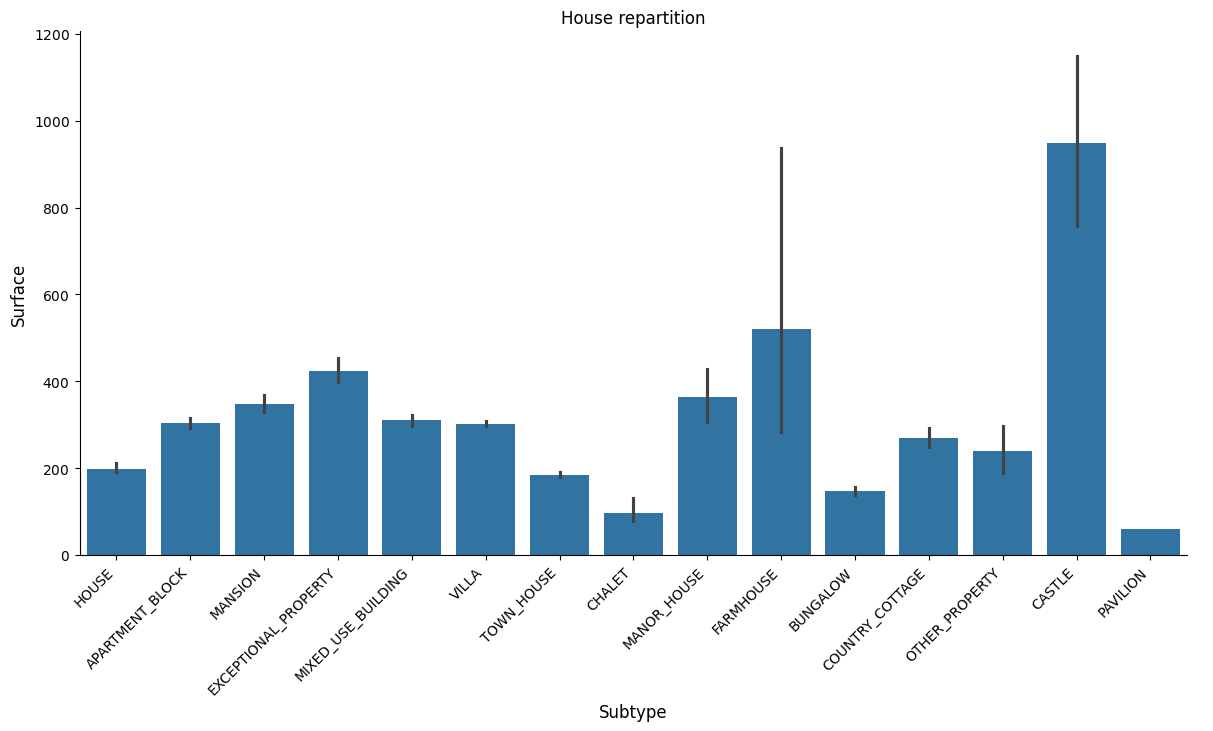

In [27]:
plt.figure(figsize=(10, 8))
g = sns.catplot(data=df_house, x="subtype", y='habitableSurface', kind="bar", height=6, aspect=2)
ax = g.ax
ax.set_title("House repartition", fontsize=12)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("Surface", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)

<Figure size 1000x800 with 0 Axes>

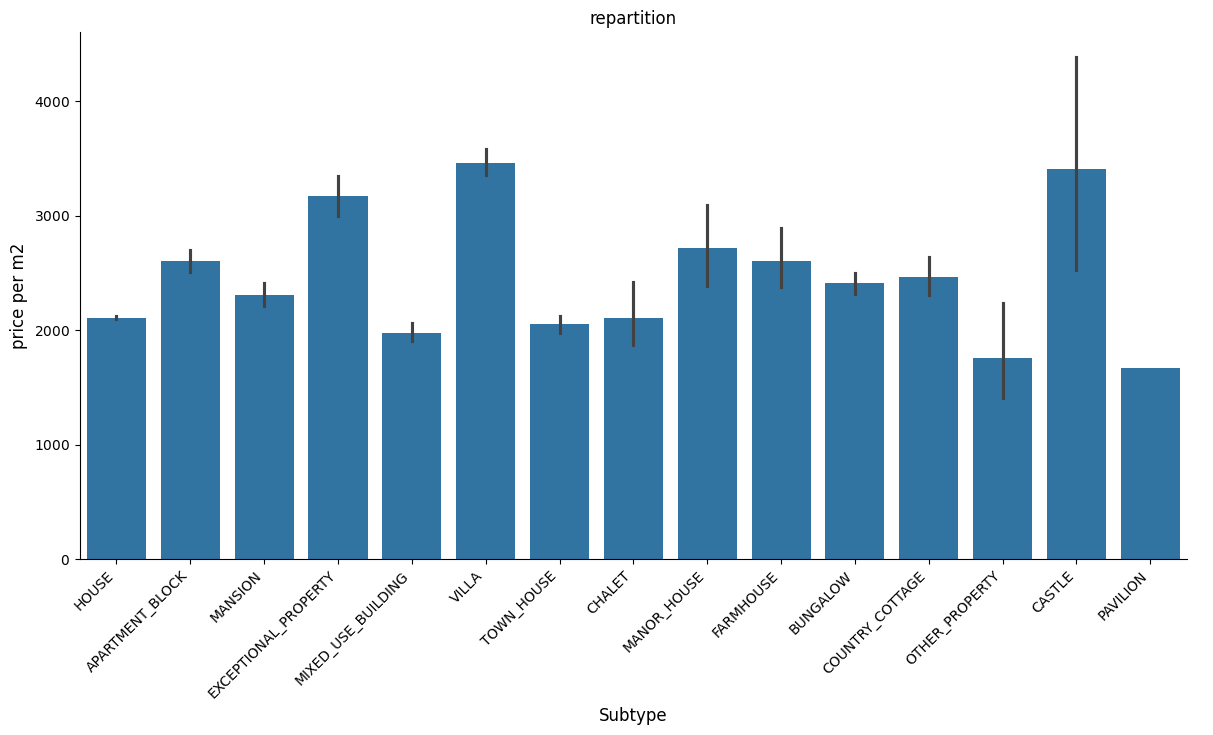

In [28]:
plt.figure(figsize=(10, 8))
g = sns.catplot(data=df_house, x="subtype", y='price_per_m2', kind="bar", height=6, aspect=2)
ax = g.ax
ax.set_title("repartition", fontsize=12)
ax.set_xlabel("Subtype", fontsize=12)
ax.set_ylabel("price per m2", fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')


formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.yaxis.set_major_formatter(formatter)


Correlation price/m² : 0.07


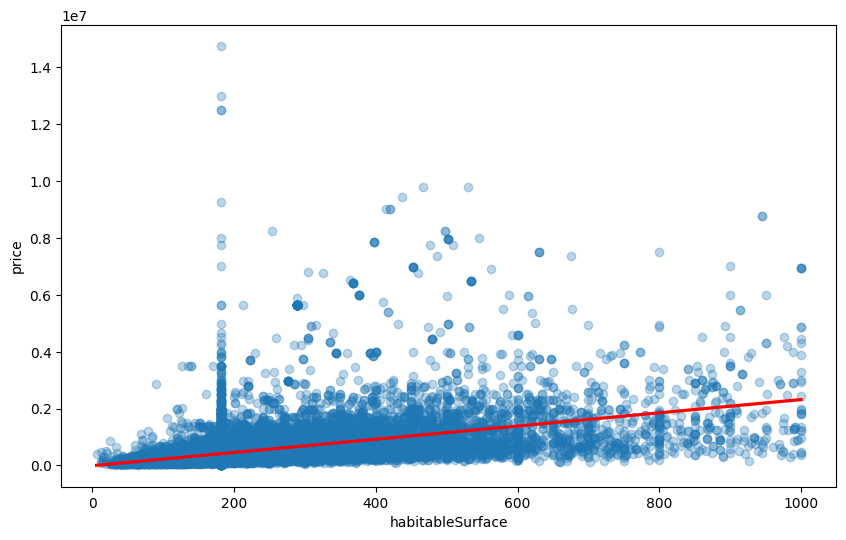

In [29]:
plt.figure(figsize=(10, 6))
house_surface = df_house[df_house['habitableSurface'] <= 1000]
sns.regplot(data=house_surface, x="habitableSurface", y="price", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
correlation = df_appart['price'].corr(df_appart['habitableSurface'])
print(f"Correlation price/m² : {correlation:.2f}")

Correlation price/bedroomCount : 0.36


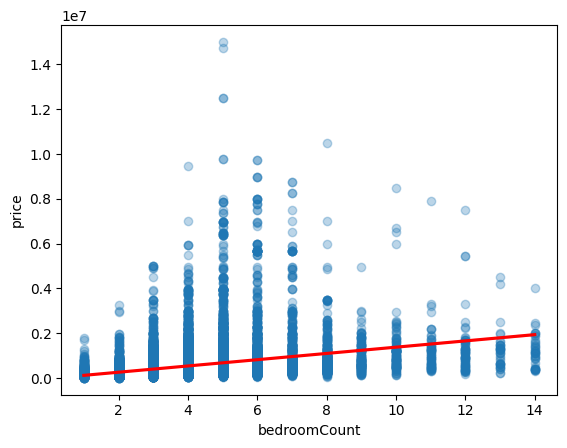

In [30]:
bedroom = df_house[(df_house['bedroomCount'] < 15) & (df_house['bedroomCount'] >= 1)]
sns.regplot(data=bedroom, x="bedroomCount", y="price", scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
correlation = df_house['price'].corr(bedroom['bedroomCount'])
print(f"Correlation price/bedroomCount : {correlation:.2f}")